In [1]:
import matplotlib.pyplot as plt
import torch
from torch.distributions import Normal, MultivariateNormal

In [2]:
prior = Normal(torch.zeros(1), torch.ones(1))
x = torch.linspace(-4,4,1000)
prior_prob = prior.log_prob(x.reshape(-1,1)).flatten().exp()

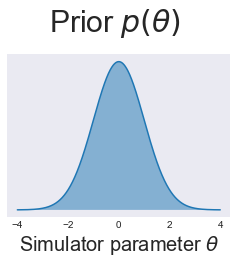

In [3]:
plt.style.use("seaborn-dark")
fig = plt.figure(figsize=(4,3))
plt.suptitle(r"Prior $p(\theta)$", fontsize=30, y=1.1)
plt.plot(x,prior_prob)
plt.fill_between(x, torch.zeros(len(prior_prob)), prior_prob, alpha=0.5)
plt.tick_params(
    left=False,
    right=False,
    labelleft=False)
plt.xlabel(r"Simulator parameter $\theta$", fontsize=20)
fig.savefig("prior.svg", bbox_inches = "tight", transparent=True)


In [6]:
# fig = plt.figure(figsize=(4,3))
# plt.suptitle(r"  Simulator $x = s(\theta)$", fontsize=20)
# textstr = "\n".join([r"  $\mu = \theta^2$; $\epsilon \sim \mathcal{N}(0,1)$ ", r"  $x = \mu + \epsilon$"])

# # these are matplotlib.patch.Patch properties
# props = dict(boxstyle='round', facecolor='white')

# # place a text box in upper left in axes coords
# plt.text(0.00, 0.85, r"def s($\theta$):                  ", bbox=props, horizontalalignment="left", fontsize=18)
# plt.text(0.00, 0.5, textstr, fontsize=18,horizontalalignment='left', bbox=props)
# plt.axis('off')
# plt.show()
# fig.savefig("simulator.svg", bbox_inches = "tight", transparent=True)

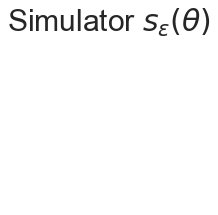

In [18]:
import matplotlib.image as mpimg
fig = plt.figure(figsize=(4,3))
img = mpimg.imread("white.png")
plt.axis("off")
plt.suptitle(r"Simulator $s_\epsilon(\theta)$", fontsize=30)
plt.tight_layout()
plt.imshow(img)

fig.savefig("simulator.svg", bbox_inches = "tight", transparent=True)

In [8]:
def log_prob(x):
    logp1 = Normal(torch.zeros(len(x)), torch.ones(len(x))).log_prob(x[:,0])
    logp2 = Normal(x[:,0]**2, torch.ones(len(x))).log_prob(x[:,1])
    return logp1 + logp2

In [9]:
def sample(n):
    x = torch.randn((n,))
    y = x**2 + torch.randn((n,))
    return torch.vstack((x,y)).T

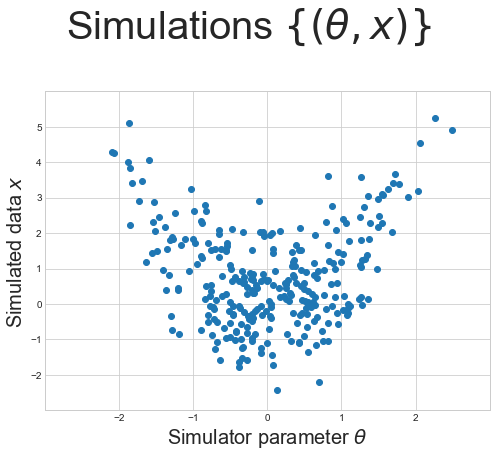

In [10]:
plt.style.use("seaborn-whitegrid")
samples = sample(300)
fig = plt.figure(figsize=(7,6))
fig.suptitle(r"Simulations $\{(\theta,x)\}$", fontsize=40, y=1.05)
plt.scatter(samples[:,0], samples[:,1])
plt.xlabel(r"Simulator parameter $\theta$", fontsize=20)
plt.ylabel(r"Simulated data $x$", fontsize=20)
plt.ylim(-3,6)
plt.xlim(-3,3)
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2,3,4,5])
plt.tight_layout()
fig.savefig("simulations.svg", bbox_inches = "tight", transparent=True)

In [11]:
import numpy as np
X = np.linspace(-4, 4, 1000)
Y = np.linspace(-4, 12, 1000)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = log_prob(torch.tensor(pos).reshape(-1,2)).reshape(1000,1000).exp()

<ipython-input-13-a64e07cf7532>:4: UserWarning: The following kwargs were not used by contour: 'zdir', 'rasterized'
  plt.contourf(X, Y, Z, zdir='z', cmap="viridis", levels=10, rasterized=False)


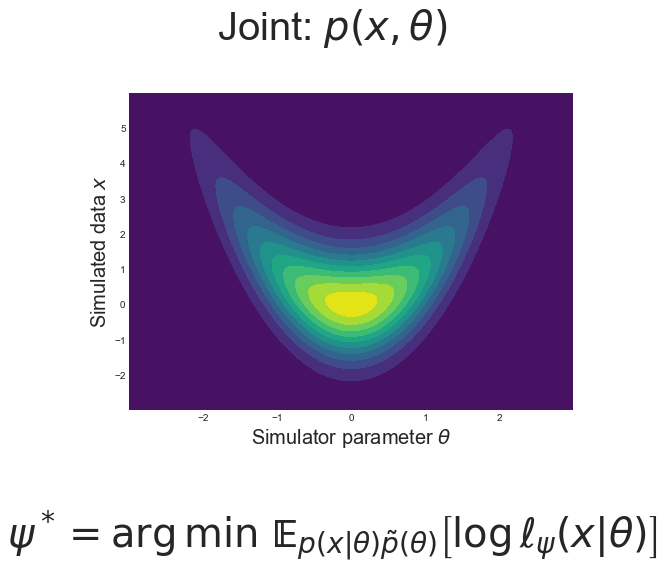

In [13]:
plt.style.use("seaborn-dark")
fig = plt.figure(figsize=(7,6))
fig.suptitle(r"Joint: $p(x,\theta)$", fontsize=40, y=1.05)
plt.contourf(X, Y, Z, zdir='z', cmap="viridis", levels=10, rasterized=False)
plt.xlabel(r"Simulator parameter $\theta$", fontsize=20)
plt.ylabel(r"Simulated data $x$", fontsize=20)
plt.ylim(-3,6)
plt.xlim(-3,3)
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2,3,4,5])

txt=r"$\psi^* = \arg \min  \ \mathbf{\mathbb{E}}_{p(x|\theta)\tilde{p}(\theta)}\left[\log \ell_\psi(x|\theta) \right]$"
fig.text(.5, -0.2, txt, ha='center', fontsize=40)
plt.tight_layout()
fig.savefig("joint.svg", bbox_inches = "tight", transparent=True)

In [14]:
def posterior(x_o):
    def log_q(theta):
        x_help = torch.tensor([x_o]*len(theta))
        x = torch.hstack((theta.reshape(-1,1), x_help.reshape(-1,1)))
        return log_prob(x).flatten()
    return log_q


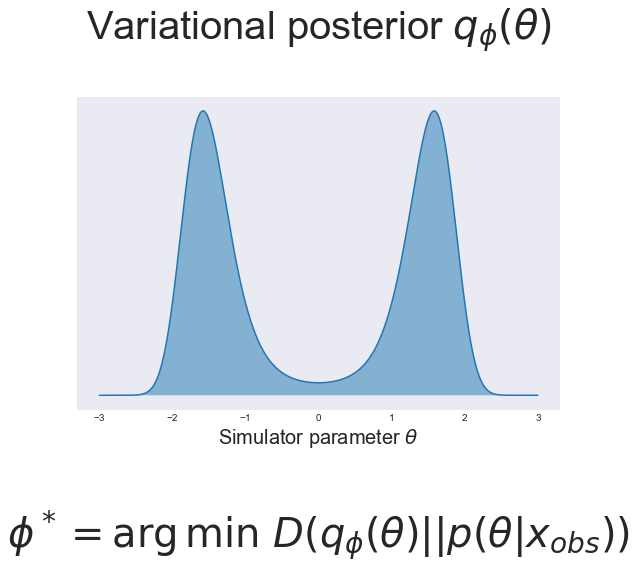

In [15]:
plt.style.use("seaborn-dark")
fig = plt.figure(figsize=(7,6))
post_prob = posterior(3)
x = torch.linspace(-3,3,1000)
q_prob = post_prob(x).exp()
plt.suptitle(r"Variational posterior $q_\phi(\theta)$", fontsize=40,y=1.05)
plt.plot(x, q_prob)
plt.fill_between(x, torch.zeros(len(q_prob)), q_prob, alpha=0.5)
plt.tick_params(
    left=False,
    right=False,
    labelleft=False)
plt.xlabel(r"Simulator parameter $\theta$", fontsize=20)
txt=r"$\phi^* = \arg \min  \ D(q_\phi(\theta)||p(\theta|x_{obs}))$"
fig.text(.5, -0.2, txt, ha='center', fontsize=40)
plt.tight_layout()
fig.savefig("posterior.pdf")
fig.savefig("posterior.svg", bbox_inches = "tight", transparent=True)